# Lab06

# POS Tagging
POS tagging is the process of marking up a word in a corpus to a corresponding part of speech tag, based on its context and definition. This task is not straightforward, as a particular word may have a different part of speech based on the context in which the word is used

## Regular Expression Tagger

The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any word ending in `-ed` is the past participle of a verb, and any word ending with `'s` is a possessive noun. We can express these as a list of regular expressions and create our regular expression tagger accordingly. Let's see how to do it in the following example!



Here we use the `Brown Corpus` from nltk. The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University.This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. We will use the news category only for simplicity

In [ ]:
import nltk

# Downloading required corpus
nltk.download('punkt')
nltk.download('brown')

from nltk import word_tokenize
from nltk.corpus import brown

# get the sentences of news category from brown corpus
brown_sents = brown.sents(categories='news')
# get the corresponding POS-tagged sentences
brown_tagged_sents = brown.tagged_sents(categories='news')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Define regular expression patterns in the format of `a list of (regexp, tag) pairs`, we will use it to define the regular expression tagger. Each of the `(regexp, tag)` element indicates that a word matching the `regexp` should be tagged with the corresponding `tag`.

In [ ]:
# Let's try with only the following 8 types of tags for now
# A full list of tags from brown corpus can be found from: https://varieng.helsinki.fi/CoRD/corpora/BROWN/tags.html
patterns = [
        (r'.*ing$', 'VBG'),               # gerunds
        (r'.*ed$', 'VBD'),                # simple past
        (r'.*es$', 'VBZ'),                # 3rd singular present
        (r'.*ould$', 'MD'),               # modals
        (r'.*\'s$', 'NN$'),               # possessive nouns
        (r'.*s$', 'NNS'),                 # plural nouns
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                     # nouns (default)
]

Build regular expression tagger using the defined patterns and try to tag a sentence from the brwon corpus. Here, we use the [nltk.RegexpTagger](https://tedboy.github.io/nlps/generated/generated/nltk.RegexpTagger.html).

In [ ]:
# We can simply pass the patterns list we created above to the nltk.RegxpTagger
regexp_tagger = nltk.RegexpTagger(patterns)

# Print one of the sentences
print(brown_sents[3])
# Print one of the tagged sentences - tagged by our regular expression tagger, simply using the .tag() method
print(regexp_tagger.tag(brown_sents[3]))
# Print the sentence with ground truth tag for comparison
print(brown_tagged_sents[3])

['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', "''", ',', 'the', 'jury', 'said', ',', '``', 'considering', 'the', 'widespread', 'interest', 'in', 'the', 'election', ',', 'the', 'number', 'of', 'voters', 'and', 'the', 'size', 'of', 'this', 'city', "''", '.']
[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]
[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('relative', 'JJ'), ('handful', 'NN'), ('of', 'IN'), ('suc

Evaluate the tagger using the gold (sentences with ground truth tags).

In [ ]:
# Evaluate the tagger (Calculate the accuracy/performance), simply using the .evaluate() method
# The brown_tagged_sents are the gold tagged sentences
regexp_tagger.evaluate(brown_tagged_sents)

<ipython-input-4-b99ffe30ac0c>:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(brown_tagged_sents)


0.20326391789486245

Let's try to tag any sentence we create.

In [ ]:
raw = 'This race is awesome, I want to race too'
tokens = word_tokenize(raw)

print(regexp_tagger.tag(tokens))

[('This', 'NNS'), ('race', 'NN'), ('is', 'NNS'), ('awesome', 'NN'), (',', 'NN'), ('I', 'NN'), ('want', 'NN'), ('to', 'NN'), ('race', 'NN'), ('too', 'NN')]


## nltk POS tagger

Another easy way to get the POS tags is to directly utilize the ready-to-parse POS tagger - [nltk.tag.pos_tag()](https://www.nltk.org/api/nltk.tag.pos_tag.html), which provides a trained perceptron-based model that can assign the POS tags to the input sentence(s).

In [ ]:
# Import the POS tagger
from nltk.tag import pos_tag
# download the dependency and resource as required
nltk.download('averaged_perceptron_tagger')

# Let's still use the example sentence from the previous section above
raw = 'This race is awesome, I want to race too'
tokens = word_tokenize(raw)

print(pos_tag(tokens))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('This', 'DT'), ('race', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ'), (',', ','), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('race', 'NN'), ('too', 'RB')]


In [ ]:
# We can also tag multiple sentences at once using nltk.tag.pos_tag_sents()
from nltk.tag import pos_tag_sents

# Let's try to add one more sentences
raw_1 = 'This event is so great, I want to join it again'
tokens_1 = word_tokenize(raw_1)

# Parse the list of two sentences
print(pos_tag_sents([tokens, tokens_1]))

[[('This', 'DT'), ('race', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ'), (',', ','), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('race', 'NN'), ('too', 'RB')], [('This', 'DT'), ('event', 'NN'), ('is', 'VBZ'), ('so', 'RB'), ('great', 'JJ'), (',', ','), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('join', 'VB'), ('it', 'PRP'), ('again', 'RB')]]


# Bi-LSTM based POS Tagger (Pytorch)

In this example, we would try to train a PoS tagger using Bi-LSTM. We will input the textual sequence into the Bi-LSTM model and assign each word with a POS tag.

![alt text](https://usydnlpgroup.files.wordpress.com/2020/03/bi-lstm_nton-e1586049916759.png)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Data preperation

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nltk.download('treebank')
from nltk.corpus import treebank

import numpy as np
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
# Retrieve tagged sentences from treebank corpus
tagged_sentences = treebank.tagged_sents()

print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(treebank.tagged_words()))
#tagged_words(): list of (str,str) tuple

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
Tagged sentences:  3914
Tagged words: 100676


In [ ]:
# Extract the sentences and the corresponding POS tags
sentences, sentence_tags =[], []
for tagged_sentence in tagged_sentences:
    #The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together,
    #and then the second item in each passed iterator are paired together etc.
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    sentence_tags.append(np.array(tags))

print(sentences[5])
print(sentence_tags[5])

['Lorillard' 'Inc.' ',' 'the' 'unit' 'of' 'New' 'York-based' 'Loews'
 'Corp.' 'that' '*T*-2' 'makes' 'Kent' 'cigarettes' ',' 'stopped' 'using'
 'crocidolite' 'in' 'its' 'Micronite' 'cigarette' 'filters' 'in' '1956'
 '.']
['NNP' 'NNP' ',' 'DT' 'NN' 'IN' 'JJ' 'JJ' 'NNP' 'NNP' 'WDT' '-NONE-' 'VBZ'
 'NNP' 'NNS' ',' 'VBD' 'VBG' 'NN' 'IN' 'PRP$' 'NN' 'NN' 'NNS' 'IN' 'CD'
 '.']


In [ ]:
# Split the data into trainning set and test set using sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
(train_sentences, test_sentences, train_tags, test_tags) = train_test_split(sentences, sentence_tags, test_size=0.2, random_state = 42)

### Making vocabs with special tokens

*PAD: Padding*

*OOV: Out Of Vocabulary*

In [ ]:
# First, let's get the unique words and tags from the corpus above
words, tags = set([]), set([])

for s in train_sentences:
    for w in s:
        words.add(w.lower())

for ts in train_tags:
    for t in ts:
        tags.add(t)

# Now, let's add the special tokens for padding and out-of-vocabulary to the unique words as our final vocab
# For better illustration, let's make them as the first and second tokens in our vocab, i.e.,
# word2index['[PAD]'] = 0
# word2index['[OOV]'] = 1
vocab = ['[PAD]', '[OOV]']
vocab.extend(list(words))
word2index = {w: i for i, w in enumerate(vocab)} # Dictionary for mapping a word to a unique word index

tag2index = {t: i + 2 for i, t in enumerate(list(tags))} # Dictionary for mapping a POS tag to a unique tag index
tag2index['[PAD]'] = 0  # The special value used to tag padding
tag2index['[OOV]'] = 1  # The special value used to tag OOVs

index2tag = {i: t for t, i in tag2index.items()} # Dictionary for mapping a unique index tag index back to the corresponding POS tag, which is useful when doing the actual predictions (e.g., in the exercise E1)

In [ ]:
# Convert the word into index, which can be used for looking up the corresponding word embeddings later
def encode_sentences(sentences):
    res = []
    for sent in sentences:
        # For any word that is not in our word vocab, use [OOV] for representating it
        temp = [ word2index[word.lower()] if word.lower() in word2index else word2index['[OOV]'] for word in sent]
        res.append(temp)
    return res


# Encode both train and test set using the conversion function encode_sentences() defined above
train_sentences_encoded = encode_sentences(train_sentences)
test_sentences_encoded = encode_sentences(test_sentences)


# Convert the POS tag into index as ground truth for training and evaluation
def tag_to_index(tags_list):
    res = []
    for tags in tags_list:
        # For any tag that is not in our tag vocab, use [OOV] for representating it
        temp = [tag2index[tag] if tag in tag2index else tag2index['[OOV]'] for tag in tags]
        res.append(temp)
    return res

# Encode both train and test set tags using the conversion function tag_to_index() defined above
train_tags_y = tag_to_index(train_tags)
test_tags_y = tag_to_index(test_tags)

### Padding

In [ ]:
# Let's decide the max length, simply based on the max length of the training set
max_length = len(max(train_sentences_encoded, key=len))
print(max_length)

271


In [ ]:
# Pad the sequence based on the max length defined, to make sure the list of sequences are of same length
def pad_sequence(seq_list, max_length, index_dict):
    res = []
    for seq in seq_list:
        temp = seq[:]
        # If original length is greater than the defined max length, trim it
        if len(seq)>max_length:
            res.append(temp[:max_length])
        else: # If original length is less than the defined max length, pad it
            temp += [index_dict['[PAD]']] * (max_length - len(seq))
            res.append(temp)
    return np.array(res)

# Pad the train and test set using the pad_sequence() function defined above, for both input (words) and labels (tags)
train_sentences_encoded_pad = pad_sequence(train_sentences_encoded, max_length, word2index)
test_sentences_encoded_pad = pad_sequence(test_sentences_encoded, max_length, word2index)
train_tags_y_pad = pad_sequence(train_tags_y, max_length, tag2index)
test_tags_y_pad = pad_sequence(test_tags_y, max_length, tag2index)

### Build Dataset and Dataloader for training data

Here we use the PyTorch DataLoader to wrap our dataset for training and evaluation. The PyTorch DataLoader class is an important tool to help us prepare, manage, and serve our data to our deep learning networks. It allows us to define a dataset to work with, batch the data, shuffle the data etc.

In [ ]:
from torch.utils.data import TensorDataset
#TensorDataset is a ready to use class to represent our data as list of tensors.
#More detailed info about the TensorDataset, https://pytorch.org/docs/1.1.0/_modules/torch/utils/data/dataset.html#TensorDataset
train_data = TensorDataset(torch.from_numpy(train_sentences_encoded_pad), torch.from_numpy(train_tags_y_pad))

from torch.utils.data import DataLoader
#More detailed info about the dataLoader, https://pytorch.org/docs/1.1.0/_modules/torch/utils/data/dataloader.html
batch_size = 128
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
# shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).

## Model

### nn.Embedding - lookup table construction using pretrained word embeddings
In lab04 E1, we provided the embeddings for each token in each sentence in advance by constructing them using the pre-trained word embedding model. Therefore, after getting the embedding of each sentence, we would get a tensor with the shape of (train_size, seq_length, emb_dimension). However, if these three values (train_size, seq_length, emb_dimension) are large enough, we might get Out-Of-Memory(OOM) issue due to limited CPU/GPU. One solution is using **[nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)** as a lookup table to get the embedding for each token/word during the training process instead of generating them all beforehand.



First, let's define the lookup embedding table, which will be a matrix of shape (vocab_size, embedding_dimension). We will use this matrix to initialize the weight of our embedding layer. Here, we will concatenate the 25-dim and 50-dim glove embeddings pretrained on twitter to construct our lookup table.

In [ ]:
# Download the first Pre-trained Embedding
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-25")

# Create the Embedding lookup table for the first pre-trained embedding
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(vocab):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        # The pretrained glove twitter does not contain the embeddings for the [PAD] and [OOV] tokens we defined
        # Here, we just use all 0 for both [PAD] and [OOV] tokens for simplicity
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

# print(emb_table)

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
# Download another pre-trained word embedding
word_emb_model2 = api.load("glove-twitter-50")

emb_dim = word_emb_model.vector_size+word_emb_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(vocab):
    if word in word_emb_model:
        emb_table.append(np.concatenate((word_emb_model[word],word_emb_model2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
# Our final embedding lookup table has the shape of (vocab_size, embedding_dimension)
# We will use it to initialize the nn.Embedding layer in our model soon
emb_table.shape

(10140, 75)

### Modeling - initialize the nn.Embedding using the constructed lookup table

In the following model definition, we will use the constructed lookup table to initialize the nn.Embedding layer. Once its initialized, when we feed the sequence data encoded as word index into the model, each index will lookup the corresponding embedding vector from the nn.Embedding layer lookup table (matrix) as the representation for the word.

In [ ]:
import torch.nn as nn

class LSTMTagger(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        # Here, we first create the embedding layer
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        # [IMPORTANT] Then, we initialize the Embedding layer with the lookup table we created
        self.word_embeddings.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.word_embeddings.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds)
        # Since we are doing the sequence labeling (tagging) here, we need to use all the time steps of the hidden states (try to compare with previous labs where we did the sequence-level classification based on the last time step of the hidden state)
        tag_space = self.hidden2tag(lstm_out)
        return tag_space

# Embedding dimension for creating the nn.Embedding layer, which should be the dimension number of our created word embedding
EMBEDDING_DIM = emb_table.shape[-1]
# Hidden dimension of the Bi-LSTM layer
HIDDEN_DIM = 256

model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word2index), len(tag2index)).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from sklearn.metrics import accuracy_score

# Training
number_epochs = 20

for epoch in range(number_epochs):
    loss_now = 0.0
    correct = 0

    for sentence,targets in train_loader:
        sentence = sentence.to(device)
        targets = targets.to(device)

        temp_batch_size = sentence.shape[0]

        model.train()
        optimizer.zero_grad()
        tag_space = model(sentence)
        loss = loss_function(tag_space.view(-1, tag_space.shape[-1]), targets.view(-1))
        loss.backward()
        optimizer.step()

        loss_now += loss.item() * temp_batch_size
        predicted = torch.argmax(tag_space, -1)
        # Note: The training accuracy here is calculated with "PAD", which will result in a relative higher accuracy.
        correct += accuracy_score(predicted.view(-1).cpu().numpy(),targets.view(-1).cpu().numpy())*temp_batch_size

    print('Epoch: %d, training loss: %.4f, training accuracy: %.2f%%'%(epoch+1,loss_now/len(train_data),100*correct/len(train_data)))

Epoch: 1, training loss: 1.5908, training accuracy: 87.63%
Epoch: 2, training loss: 0.2926, training accuracy: 92.89%
Epoch: 3, training loss: 0.2343, training accuracy: 93.98%
Epoch: 4, training loss: 0.1860, training accuracy: 95.19%
Epoch: 5, training loss: 0.1452, training accuracy: 96.20%
Epoch: 6, training loss: 0.1154, training accuracy: 97.05%
Epoch: 7, training loss: 0.0954, training accuracy: 97.56%
Epoch: 8, training loss: 0.0823, training accuracy: 97.86%
Epoch: 9, training loss: 0.0729, training accuracy: 98.05%
Epoch: 10, training loss: 0.0659, training accuracy: 98.22%
Epoch: 11, training loss: 0.0603, training accuracy: 98.40%
Epoch: 12, training loss: 0.0558, training accuracy: 98.52%
Epoch: 13, training loss: 0.0521, training accuracy: 98.61%
Epoch: 14, training loss: 0.0491, training accuracy: 98.69%
Epoch: 15, training loss: 0.0464, training accuracy: 98.75%
Epoch: 16, training loss: 0.0440, training accuracy: 98.81%
Epoch: 17, training loss: 0.0420, training accura

## Test with the test set

In [ ]:
model.eval()
sentence = torch.from_numpy(test_sentences_encoded_pad).to(device)
tag_space = model(sentence)
predicted = torch.argmax(tag_space, -1)
predicted = predicted.cpu().numpy()

# cut off the PAD part
test_len_list = [len(s) for s in test_sentences_encoded]
actual_predicted_list= []
for i in range(predicted.shape[0]):
    actual_predicted_list+=list(predicted[i])[:test_len_list[i]]

# get actual tag list
actual_tags = sum(test_tags_y, [])

print('Test Accuracy: %.2f%%'%(accuracy_score(actual_predicted_list,actual_tags)*100))

Test Accuracy: 86.11%


# Named Entity Recognition
Named Entity Recognition (NER) is the subtask of information extraction that seeks to locate and classify named entity mentions in unstructured text into pre-defined categories such as the person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

## Named Entity Recognition with Spacy
[spaCy](https://spacy.io/) is a free, open-source library for NLP in Python, which is designed to make it easy to build systems for information extraction or general-purpose natural language processing. The following lines show how to build named entity recognizer with SpaCy, to identify the names of things, such as persons, organizations, or locations. SpaCy’s named entity recognition has been trained on the [OntoNotes 5 corpus](https://catalog.ldc.upenn.edu/LDC2013T19) and it supports the following entity types: [spacy docs](https://spacy.io/models/en#en_core_web_sm) (See the *NER* under the *Label Scheme* section in the spacy docs）

In [ ]:
# Let's try with wikipedia data
!pip install wikipedia
import wikipedia

# get the wikipedia page of Barack Obama
wikip = wikipedia.page("Barack_Obama")

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=67c8f1c46926d4ae338ed33f3ea966dd68804250739640ac36fc206993924333
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import spacy
import en_core_web_sm

# loading pre-trained model of NER
nlp = en_core_web_sm.load()

In [ ]:
# parse the data, it will return the processed document as an instance of the predefined class <Doc>
article = nlp(wikip.content)
print(type(article))

<class 'spacy.tokens.doc.Doc'>


In [ ]:
# more specifically, predictions will be saved to Doc.ents as a tuple.
# Thus, we can access the predictions via the Doc.ents, i.e., article.ents in our case here
print(type(article.ents))
print(len(article.ents))

<class 'tuple'>
2108


In [ ]:
# Within the prediction result tuple, each element is an instance of the predefined class <Span>
print(type(article.ents[0]))

# We can finally access the parsed NER tag via the 'label_' attribute of each span
# For example, let's try to access the NER tag of the first span
print(article.ents[0].text) # the text
print(article.ents[0].label_) # the NER tag


<class 'spacy.tokens.span.Span'>
Barack Hussein Obama II
PERSON


In [ ]:
from collections import Counter

# count the number of entities by type found from wikipedia page
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 345,
         'DATE': 492,
         'NORP': 120,
         'ORDINAL': 64,
         'GPE': 416,
         'ORG': 360,
         'LOC': 58,
         'WORK_OF_ART': 18,
         'EVENT': 21,
         'CARDINAL': 100,
         'PRODUCT': 10,
         'LANGUAGE': 4,
         'FAC': 16,
         'MONEY': 27,
         'PERCENT': 38,
         'LAW': 12,
         'TIME': 4,
         'QUANTITY': 3})

In [ ]:
# getting the top 10 words recognised as named entity
items = [x.text for x in article.ents]
Counter(items).most_common(10)

[('Obama', 278),
 ('U.S.', 46),
 ('first', 44),
 ('the United States', 23),
 ('American', 14),
 ('2009', 14),
 ('Chicago', 14),
 ('Congress', 14),
 ('Barack Obama', 14),
 ('Democratic', 13)]

In [ ]:
# look into the first sentence
sentences = [x for x in article.sents]
print(sentences[0])

# display each tag of the sentence
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[0]])

Barack Hussein Obama II ( , bə-RAHK hoo-SAYN oh-BAH-mə; born August 4, 1961) is an American politician who served as the 44th president of the United States from 2009 to 2017.
[(Barack, 'B', 'PERSON'), (Hussein, 'I', 'PERSON'), (Obama, 'I', 'PERSON'), (II, 'I', 'PERSON'), ((, 'O', ''), (,, 'O', ''), (bə, 'O', ''), (-, 'O', ''), (RAHK, 'O', ''), (hoo, 'O', ''), (-, 'O', ''), (SAYN, 'O', ''), (oh, 'O', ''), (-, 'O', ''), (BAH, 'O', ''), (-, 'O', ''), (mə, 'O', ''), (;, 'O', ''), (born, 'O', ''), (August, 'B', 'DATE'), (4, 'I', 'DATE'), (,, 'I', 'DATE'), (1961, 'I', 'DATE'), (), 'O', ''), (is, 'O', ''), (an, 'O', ''), (American, 'B', 'NORP'), (politician, 'O', ''), (who, 'O', ''), (served, 'O', ''), (as, 'O', ''), (the, 'O', ''), (44th, 'B', 'ORDINAL'), (president, 'O', ''), (of, 'O', ''), (the, 'B', 'GPE'), (United, 'I', 'GPE'), (States, 'I', 'GPE'), (from, 'O', ''), (2009, 'B', 'DATE'), (to, 'O', ''), (2017, 'B', 'DATE'), (., 'O', '')]


In [ ]:
from spacy import displacy

# display whole sentences using displacy.render() from spacy
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

# Lab 6 Exercise
Please complete the following **question E1** for Lab 6 and check with your Lab Facilitator in the lab.

**Submission Due**: Your Lab 7 (in Week 8)

**Submission Method**: Show your final code to your tutor during the Lab.

## E1. The POS Taggers (2 Marks)

In this exercise, you are to classify part-of-speech(pos) tags on **user-defined sentences** using the two pos taggers for comparison, including: (1) the [Bi-LSTM model trained](#scrollTo=dxHS0Ji2p5X3) right before the exercise; and (2) the [nltk ready-to-use pos taggers](#scrollTo=rktdV97F3kRe)  (You can call the functions from the previous sections and use the variables directly, i.e., assume all the sections above are already finished running).

You should complete **2 functions** below which returns the POS tags list for the input sample sentences (the `test_samples` below).




In [ ]:
# The two POS tagger functions you are to complete should be able to use the following list of sentences as input and return the tagged output accordingly
test_samples = [
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]

### (1) The Bi-LSTM POS tagger function
**Note**: Your output should be "cut off" to the actual length of each sentence if padded. The sample output for reference can be found in the end of this exercise.

In [ ]:
# [IMPORTANT] Please complete the function bellow
# Hint: You can refer to the sample code from the [Bi-LSTM based POS Tagger] section above and the previous labs regarding:
# 1. Encode the input sentences (converting to index and pad to max length), i.e., using the encode_sentences() and pad_sequence() functions above
# 2. Get the trained model ready, i.e., the model we trained as Bi-LSTM POS tagger above
# 3. Convert the encoded sentences into PyTorch tensor as we did in previous lab, e.g., torch.from_numpy(data).to(device)
# 4. Feed the input data tensor to the model and get the output score
# 5. Get the predicted tag **index** based on the max score, e.g., torch.argmax(scores, -1).cpu().numpy()
# 6. Convert the derived **index** into the corresponding POS tag, using the index2tag dictionary we created above
def test_model(test_samples):

    # Your final predicted POS tags for each sentence will be saved in the token_sequences list below as the final returned value of this function
    # i.e., the token_sequences will be a list of tagged sequences (for the two input sentences)
    # Please refer to the sample output and see what structure should the token_sequences list be
    token_sequences = []
    # [TODO]Please Complete this part - refer to the hint above
    # [NOTE]: Remember to remove the prediction results for the padding tokens if there is any, hint: you can refer to the original sentence length to decide which predictions should be kept













    return token_sequences


print("Input sentences: ")
print(test_samples)
print()
print("Tagged sentences: ")
print(test_model(test_samples))

### (2) The nltk POS tagger function

In [ ]:
def test_nltk_tagger(test_samples):

  # [TODO] Please Complete this part - using the nltk pos tagger to parse the input sentences
  token_sequences =



  # the token_sequences will be a list of tagged sequences (for the two input sentences), please refer to the sample output
  return token_sequences

print("Input sentences: ")
print(test_samples)
print()
print("Tagged sentences: ")
print(test_nltk_tagger(test_samples))

### (1) Sample output for The Bi-LSTM POS tagger function.

 As you can see, the returned value of the test_model() function should be ***`a list of POS tag sequences that correspond to the input list of sentences`***, e.g., the input here is the list of 2 sentences, then the output of the test_model() function will be the list of 2 POS tag sequences of the same length.

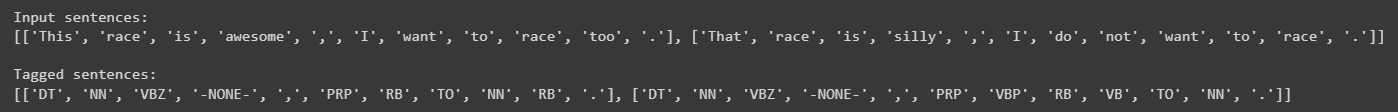

### (2) Sample output for The nltk POS tagger function.

Similarly, the returned value of the test_nltk_tagger() function should also be ***`a list of POS tag sequences that correspond to the input list of sentences`, with the only difference that the original words are also included due to the format of returned value of the nltk POS tagger itself.***

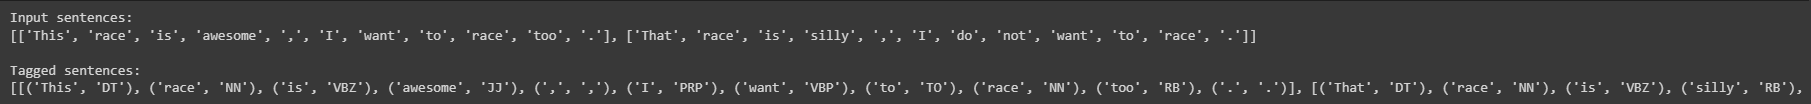

# E1 Sample Solution

In [ ]:
test_samples = [
    word_tokenize("This race is awesome, I want to race too."),
    word_tokenize("That race is silly, I do not want to race.")
]

In [ ]:

def test_model(test_samples):

    test_samples_encoded = encode_sentences(test_samples)
    test_samples_encoded_pad = pad_sequence(test_samples_encoded, max_length, word2index)

    model.eval()
    sentences = torch.from_numpy(test_samples_encoded_pad).to(device)
    tag_space = model(sentences)
    predictions = torch.argmax(tag_space, -1).cpu().numpy()

    index2tag = {i: t for t, i in tag2index.items()}

    token_sequences = []
    for i in range(len(predictions)):
        pred_list = predictions[i]
        length_temp = len(test_samples_encoded[i])
        token_sequence = [index2tag[pred_list[j]] for j in range(length_temp)]
        token_sequences.append(token_sequence)

    return token_sequences

print("Input sentences: ")
print(test_samples)
print()
print("Tagged sentences: ")
print(test_model(test_samples))


Input sentences: 
[['This', 'race', 'is', 'awesome', ',', 'I', 'want', 'to', 'race', 'too', '.'], ['That', 'race', 'is', 'silly', ',', 'I', 'do', 'not', 'want', 'to', 'race', '.']]

Tagged sentences: 
[['DT', 'NN', 'VBZ', '-NONE-', ',', 'PRP', 'VBP', 'TO', 'NN', 'RB', '.'], ['DT', 'NN', 'VBZ', '-NONE-', ',', 'PRP', 'VBP', 'RB', 'VB', 'TO', 'NN', '.']]


In [ ]:
def test_nltk_tagger(test_samples):
  return pos_tag_sents(test_samples)

print("Input sentences: ")
print(test_samples)
print()
print("Tagged sentences: ")
print(test_nltk_tagger(test_samples))

Input sentences: 
[['This', 'race', 'is', 'awesome', ',', 'I', 'want', 'to', 'race', 'too', '.'], ['That', 'race', 'is', 'silly', ',', 'I', 'do', 'not', 'want', 'to', 'race', '.']]

Tagged sentences: 
[[('This', 'DT'), ('race', 'NN'), ('is', 'VBZ'), ('awesome', 'JJ'), (',', ','), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('race', 'NN'), ('too', 'RB'), ('.', '.')], [('That', 'DT'), ('race', 'NN'), ('is', 'VBZ'), ('silly', 'RB'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ('not', 'RB'), ('want', 'VB'), ('to', 'TO'), ('race', 'NN'), ('.', '.')]]
